# Influence de l'étendue spatiale de la source sur la figure d'interférences des fentes d'Young

In [1]:
# librairies pour l'interaction
%matplotlib notebook
from ipywidgets import interact, FloatSlider, IntSlider, Layout
import ipywidgets as widgets

In [2]:
# librairies scientifiques usuelles
from scipy.signal import gausspulse
from scipy import fftpack
# graphiques
import matplotlib.pyplot as plt
from numpy import pi, exp, linspace, cos, meshgrid, sinc
from matplotlib.colors import LinearSegmentedColormap

## Influence de la position d'une seule source

On étudie de fentes d'Young, séparées de $a$ = 1 mm, éclairées par une source ponctuelle située à l'abscisse $x_s$ (voir le cours pour les notations).

In [3]:
a = 1e-3 # m
lambda0 = 546e-9 #m (raie verte du mercure)
D = 1 # m
Ds = 1 #m
I0 = 1

L'expression de la différence de marche permet de calculer l'intensité en un point donné :

In [4]:
def I(x, xs):
    delta = a*x/D+a*xs/Ds
    return 2*I0*(1+cos(2*pi*delta/lambda0))

On peut ensuite tracer l'allure de l'intensité en fonction de $x$ sur l'écran pour différentes valeurs de $x_s$.

<IPython.core.display.Javascript object>


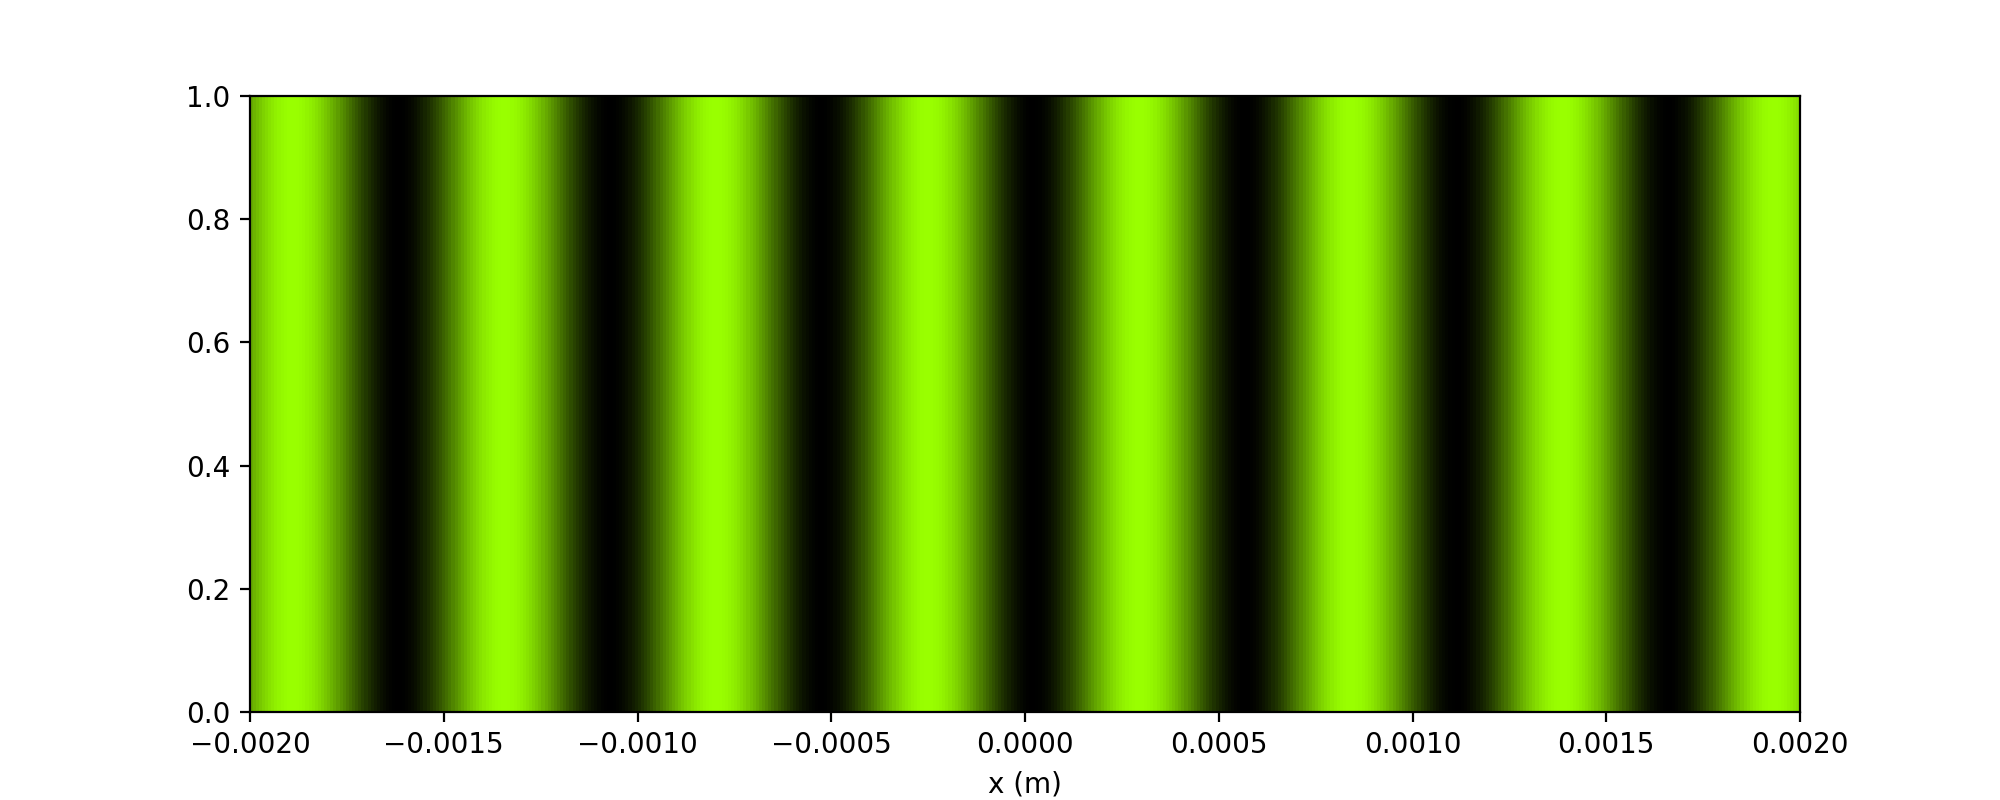

interactive(children=(FloatSlider(value=0.0, description='xs', layout=Layout(width='100%'), max=0.002, min=-0.…

<function __main__.update_xs(xs=1)>

In [5]:
# Tracé du graphique

# paramètres d'affichage
xmax = 2e-3
npoints = 500

# Couleur vert mercure
cmap1 = LinearSegmentedColormap.from_list(
    "my_colormap", ((0, 0, 0), (.6, 1, 0)), N=400, gamma=1.0)

# génération de la figure d'interférences
y, x = meshgrid(linspace(0, 1, 2), linspace(-xmax, xmax, npoints))
z = I(x, 0)
z = z[:-1, :-1]

fig = plt.figure('Influence de la position de la source', figsize=(10, 4))


quad = plt.pcolormesh(x, y, z, cmap=cmap1)

plt.xlabel("x (m)")
plt.xlim([-xmax, xmax])


# Gestion des mises à jour lorsqu'on déplace le curseur

xsmax = 2e-3
xs_widget = FloatSlider(min=-xsmax, max=xsmax, value=0, step=xsmax / 100,
                        layout=Layout(width='100%'),    readout_format='.1e',)


def update_xs(xs=1):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    z = I(x, xs)
    z = z[:-1, :-1]

    quad.set_array(z.ravel())
    plt.draw()


interact(update_xs, xs=xs_widget)

## Figure obtenue avec deux sources incohérentes

<IPython.core.display.Javascript object>


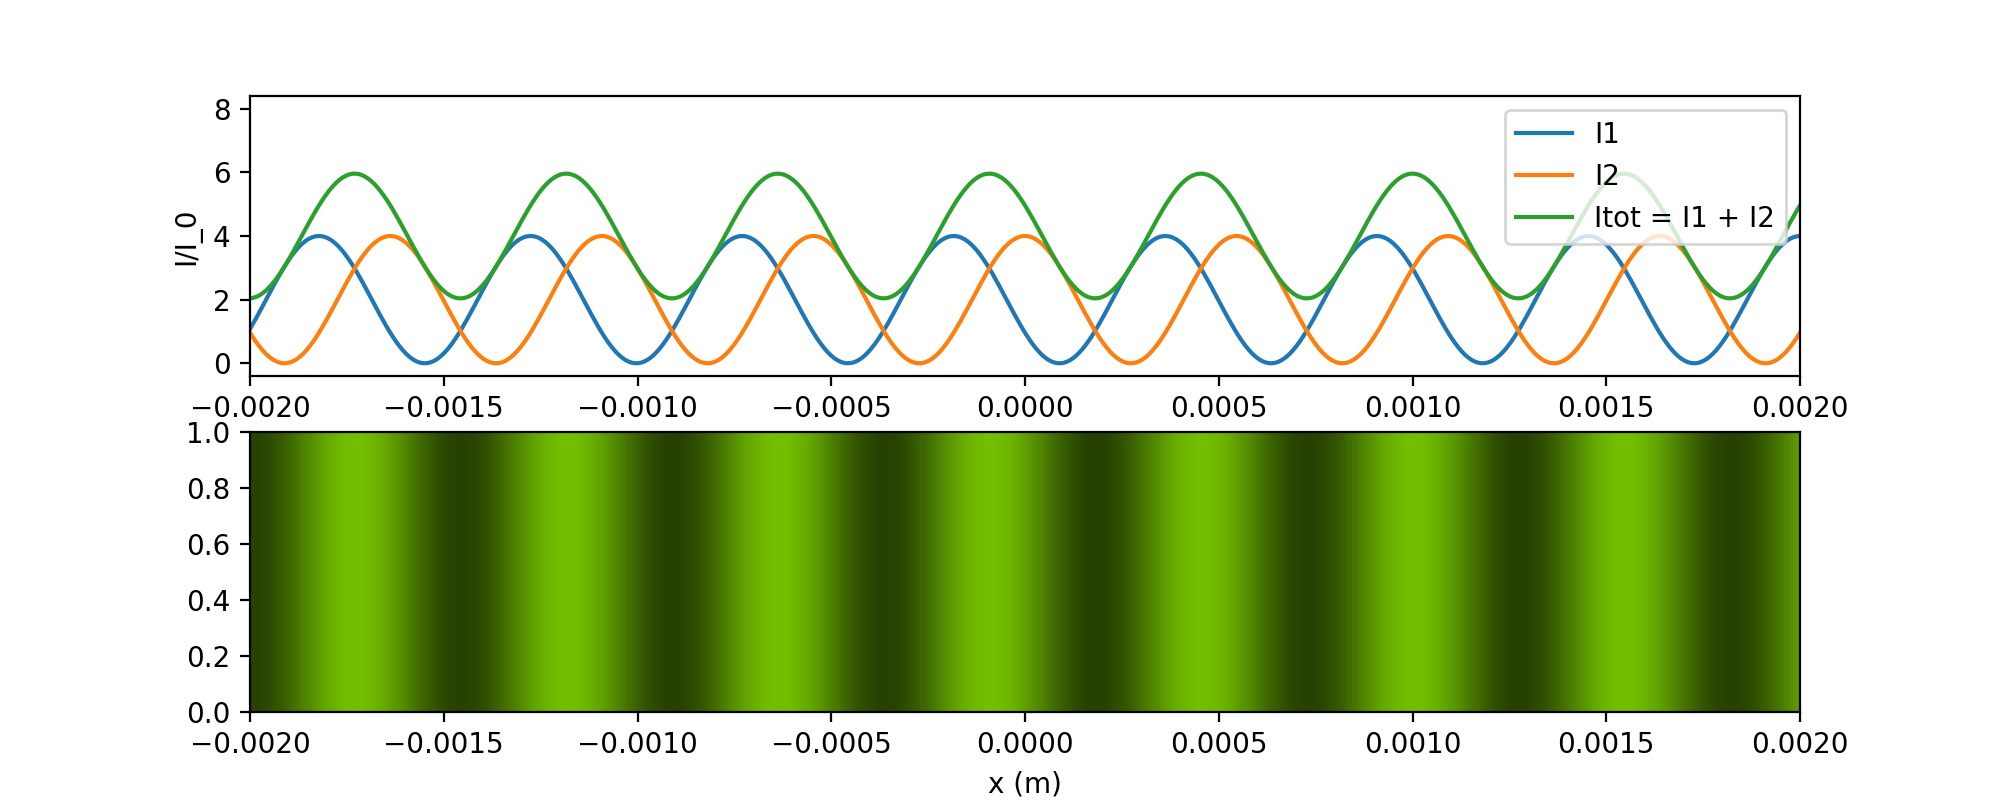

interactive(children=(FloatSlider(value=0.0, description='xs1 (m)', layout=Layout(width='100%'), max=0.002, mi…

<function __main__.update_xs(xs1=0, xs2=0)>

In [6]:
# Tracé du graphique

# paramètres d'affichage
xmax = 2e-3
npoints = 500

# Couleur vert mercure
cmap1 = LinearSegmentedColormap.from_list(
    "my_colormap", ((0, 0, 0), (.6, 1, 0)), N=400, gamma=1.0)


fig = plt.figure("Brouillage de la figure d'interférences avec 2 sources", figsize=(10, 4))

# Tracé des courbes d'intensité

ax1 = plt.subplot(211)
x1 = linspace(-xmax, xmax, npoints)
l_S1, = plt.plot(x1, I(x1, 0), label='I1')
l_S2, = plt.plot(x1, I(x1, 0), label='I2')
l_tot, = plt.plot(x1, I(x1, 0) + I(x1, 0), label='Itot = I1 + I2')

plt.xlim([-xmax, xmax])

plt.xlabel('x (m)')
plt.ylabel('I/I_0')
plt.legend(loc=1)

# Tracé de la figure d'interférences
ax2 = plt.subplot(212)
y, x = meshgrid(linspace(0, 1, 2), linspace(-xmax, xmax, npoints))
z = I(x, 0) + I(x, 0)
z = z[:-1, :-1]
quad = plt.pcolormesh(x, y, z, cmap=cmap1)

plt.xlabel("x (m)")
plt.xlim([-xmax, xmax])


# Gestion des mises à jour lorsqu'on déplace le curseur

xsmax = 2e-3
xs1_widget = FloatSlider(min=-xsmax, max=xsmax, value=0, step=xsmax / 200,
                         layout=Layout(width='100%'), description='xs1 (m)',  readout_format='.1e')
xs2_widget = FloatSlider(min=-xsmax, max=xsmax, value=0, step=xsmax / 50,
                         layout=Layout(width='100%'), description='xs2 (m)',   readout_format='.1e')


def update_xs(xs1=0, xs2=0):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    z = I(x, xs1) + I(x, xs2)
    z = z[:-1, :-1]
    l_S1.set_data([x1, I(x1, xs1)])
    l_S2.set_data([x1, I(x1, xs2)])
    l_tot.set_data([x1, I(x1, xs1) + I(x1, xs2)])

    quad.set_array(z.ravel())
    plt.draw()


interact(update_xs, xs1=xs1_widget, xs2=xs2_widget)

## Figure obtenue avec une source large

On s'intéresse à la figure d'interférences obtenue avec une source large de largeur $h$. On peut montrer que l'intensité sur l'écran est donnée par la formule ci-dessous.

In [8]:
def I_source_large(x, h):
    return 2*I0*(1+sinc(pi*h*a/(lambda0*Ds))*cos(2*pi*a*x/(lambda0*D)))

<IPython.core.display.Javascript object>


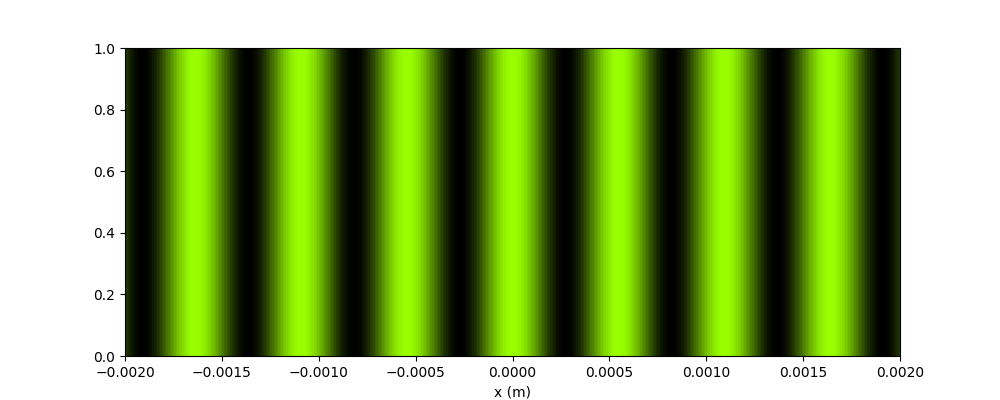

A Jupyter Widget

<function __main__.update_h>

In [10]:
# Tracé du graphique

# paramètres d'affichage
xmax = 2e-3
npoints = 500

# Couleur vert mercure
cmap1 = LinearSegmentedColormap.from_list(
    "my_colormap", ((0, 0, 0), (.6, 1, 0)), N=400, gamma=1.0)

# génération de la figure d'interférences
y, x = meshgrid(linspace(0, 1, 2), linspace(-xmax, xmax, npoints))
z = I_source_large(x, 0)
z = z[:-1, :-1]

fig = plt.figure(
    "Brouillage de la figure d'interférences avec une source large", figsize=(10, 4))


quad = plt.pcolormesh(x, y, z, cmap=cmap1)

plt.xlabel("x (m)")
plt.xlim([-xmax, xmax])


# Gestion des mises à jour lorsqu'on déplace le curseur

hmax = 1e-3  # m
h_widget = FloatSlider(min=0, max=hmax, value=0, step=hmax / 100,
                       layout=Layout(width='100%'),    readout_format='.1e', description='h(m)')


def update_h(h=0):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    z = I_source_large(x, h)
    z = z[:-1, :-1]

    quad.set_array(z.ravel())
    plt.draw()


interact(update_h, h=h_widget)